In [3]:
import pandas as pd
import sklearn
import csv
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import sys

sys.path.append(os.path.abspath("/Functions/"))

import adding_features

In [4]:
path = 'Data/'

In [5]:
train = pd.read_csv(path + 'train_incl_feat.csv', index_col = 0, compression = 'gzip')
train.head(2)

,word,garbage_score,word_length,vowels,consonants,vowelandconsonant,punctuation,dutch_char,upper,lower,...,word_numbers_ratio,word_alpha_ratio,word_accents_ratio,word_other_characters_ratio,word_vowels_consonant_ratio,word_consonant_vowels_ratio,max_count_same_char,max_count_strip_same_char,max_consecutive_consonants,max_consecutive_vowels
0,Ba)cile)'t,1,10,3,4,7,3,8,0,6,...,0.0,0.7,0.000000,0.0,0.75,1.333333,1,1,1,1
1,téycltènéoi,1,11,6,5,11,0,11,0,11,...,0.0,1.0,0.272727,0.0,1.20,0.833333,1,1,3,3


In [6]:
train.groupby('garbage_score').count()

,word,word_length,vowels,consonants,vowelandconsonant,punctuation,dutch_char,upper,lower,numbers,...,word_numbers_ratio,word_alpha_ratio,word_accents_ratio,word_other_characters_ratio,word_vowels_consonant_ratio,word_consonant_vowels_ratio,max_count_same_char,max_count_strip_same_char,max_consecutive_consonants,max_consecutive_vowels
garbage_score,,,,,,,,,,,,,,,,,,,,,
0,174036,174036,174036,174036,174036,174036,174036,174036,174036,174036,...,174036,174036,174036,174036,174036,174036,174036,174036,174036,174036
1,148356,148357,148357,148357,148357,148357,148357,148357,148357,148357,...,148357,148357,148357,148357,148357,148357,148357,148357,148357,148357


In [7]:
test = pd.read_csv(path + 'test_incl_features.csv', index_col = 0, compression = 'gzip')
test.head(2)

,word,garbage_score,word_length,vowels,consonants,vowelandconsonant,punctuation,dutch_char,upper,lower,...,word_numbers_ratio,word_alpha_ratio,word_accents_ratio,word_other_characters_ratio,word_vowels_consonant_ratio,word_consonant_vowels_ratio,max_count_same_char,max_count_strip_same_char,max_consecutive_consonants,max_consecutive_vowels
0,"Vcêlét:evangeaeß,.gtrtpeuflcert",1,31,10,17,27,3,27,0,27,...,0.0,0.903226,0.064516,0.0,0.588235,1.7,1,1,5,3
1,heeftalorrigëaffigeërt,1,22,10,12,22,0,22,0,22,...,0.0,1.000000,0.090909,0.0,0.833333,1.2,2,2,2,2


In [8]:
test.groupby('garbage_score').count()

,word,word_length,vowels,consonants,vowelandconsonant,punctuation,dutch_char,upper,lower,numbers,...,word_numbers_ratio,word_alpha_ratio,word_accents_ratio,word_other_characters_ratio,word_vowels_consonant_ratio,word_consonant_vowels_ratio,max_count_same_char,max_count_strip_same_char,max_consecutive_consonants,max_consecutive_vowels
garbage_score,,,,,,,,,,,,,,,,,,,,,
0,74588,74588,74588,74588,74588,74588,74588,74588,74588,74588,...,74588,74588,74588,74588,74588,74588,74588,74588,74588,74588
1,63582,63582,63582,63582,63582,63582,63582,63582,63582,63582,...,63582,63582,63582,63582,63582,63582,63582,63582,63582,63582


### Select features (ratio features + word length + consecutive char length

In [9]:
from sklearn.model_selection import train_test_split

features = ["word_length", 
                "word_vowel_ratio", 
                "word_consonant_ratio", 
                "word_vowelandconsonant_ratio",  
                "word_punctuation_ratio", 
                "word_dutch_char_ratio", 
                "word_uppercase_ratio", 
                "word_lowercase_ratio", 
                "word_numbers_ratio",  
                "word_other_characters_ratio", 
                "word_vowels_consonant_ratio", 
                "word_consonant_vowels_ratio", 
                "max_count_same_char", 
                "max_count_strip_same_char", 
                "max_consecutive_consonants",
                "max_consecutive_vowels",
                "word_accents_ratio"] 

X_train=train[features]  # Features
y_train=train['garbage_score']  # Labels

X_test=test[features]  # Features
y_test=test['garbage_score']  # Labels

feature_names = list(X_train.columns.values)

### Scale features 
With min max as SVM can not handle negative numbers

In [10]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import joblib
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Support Vector Machine
The linear version as the other one took to long

In [11]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [12]:
y_pred_svm = svm.predict(X_test)

In [13]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print('F1 Score: %.3f' % round(metrics.f1_score(y_test, y_pred_svm),3))

Accuracy: 0.86
Precision: 0.888
Recall: 0.795
F1 Score: 0.839


In [14]:
import pickle

pickle.dump(svm, open('garbage_model_SVM.pkl', 'wb'))

### Random Forest

In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rf=clf.predict(X_test)

In [12]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_rf),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_rf),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_rf),3))
print('F1 Score: %.3f' % round(metrics.f1_score(y_test, y_pred_rf),3))

Accuracy: 0.921
Precision: 0.948
Recall: 0.877
F1 Score: 0.911


In [ ]:
feature_names

<BarContainer object of 17 artists>

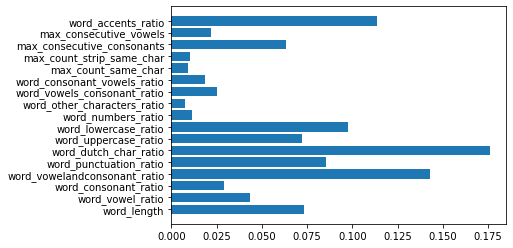

In [13]:
plt.barh(feature_names, clf.feature_importances_)

In [31]:
import pickle

pickle.dump(clf, open('garbage_model_rf.pkl', 'wb'))


### KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset  
y_pred_knn = knn.predict(X_test)

In [16]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knn),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knn),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knn),3))
print("F1 Score:",round(metrics.f1_score(y_test, y_pred_knn),3))

Accuracy: 0.917
Precision: 0.936
Recall: 0.88
F1 Score: 0.907


In [17]:
import pickle

pickle.dump(knn, open('garbage_model_KNN.pkl', 'wb'))

### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, y_train)
y_pred_nb = mnb.predict(X_test)

In [19]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_nb),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_nb),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_nb),3))
print('F1 Score: %.3f' % round(metrics.f1_score(y_test, y_pred_nb),3))

Accuracy: 0.789
Precision: 0.933
Recall: 0.582
F1 Score: 0.717


In [20]:
import pickle

pickle.dump(mnb, open('garbage_model_NB.pkl', 'wb'))